<a href="https://colab.research.google.com/github/varsha217/varsha217/blob/main/Copy_of_pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction ¶
1.1 | Chest X-ray Classification for Pneumonia Detection

The Chest X-ray Classification project utilizes a carefully curated dataset comprising 5,863 high-quality X-ray images in JPEG format. The dataset is organized into three folders, namely train, test, and val, each containing subfolders for two distinct image categories: Pneumonia and Normal.

The primary objective of this project is to develop an accurate and efficient classification model capable of identifying pneumonia cases in patients based on chest X-ray images. Pneumonia is a prevalent and potentially life-threatening respiratory infection. Early detection plays a critical role in timely intervention and effective treatment.

By leveraging advanced Machine Learning Techniques, including Deep Neural Networks and Image Analysis Algorithms, the project aims to train a model that can precisely classify chest X-ray images into two categories: Pneumonia and Normal. The model will be trained on the "train" subset of the dataset and evaluated on the test and val subsets to ensure robust performance.

The outcomes of this research have significant implications for pediatric healthcare. An accurate and automated system for pneumonia detection in chest X-ray images can assist healthcare professionals in diagnosing and treating pneumonia cases promptly. This can potentially lead to improved patient outcomes, reduced hospital stays, and better allocation of medical resources.

Furthermore, the project contributes to the field of medical imaging and computer-aided diagnosis. The insights gained from this research can be applied to other medical imaging modalities and conditions, leading to advancements in automated disease detection and diagnosis.

In [3]:
# importing all librraries
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # then move kaggle.json into the folder where the  API expects to find it.
  !mkdir -p ~/.kaggle/ && mv kaggle.jason/ && chmod 600 ~/.kaggle/kaggle.json



Saving kaggle (2).json to kaggle (2).json
User uploaded file "kaggle (2).json" with length 72 bytes
mv: missing destination file operand after 'kaggle.jason/'
Try 'mv --help' for more information.


In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="darkgrid" )
import pandas as pd
import matplotlib.pyplot as plt

<ipython-input-5-e48ad8a3f781>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [6]:
!apt-get install <ImageDataGenerator>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `apt-get install <ImageDataGenerator>'


In [7]:
from zipfile import ZipFile
file_name = "/content/chest-xray-pneumonia.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')


done


In [8]:
#Define image size and othe parameters
img_width, img_height = 256,256
batch_size = 32
epochs= 10
num_of_classes = 2


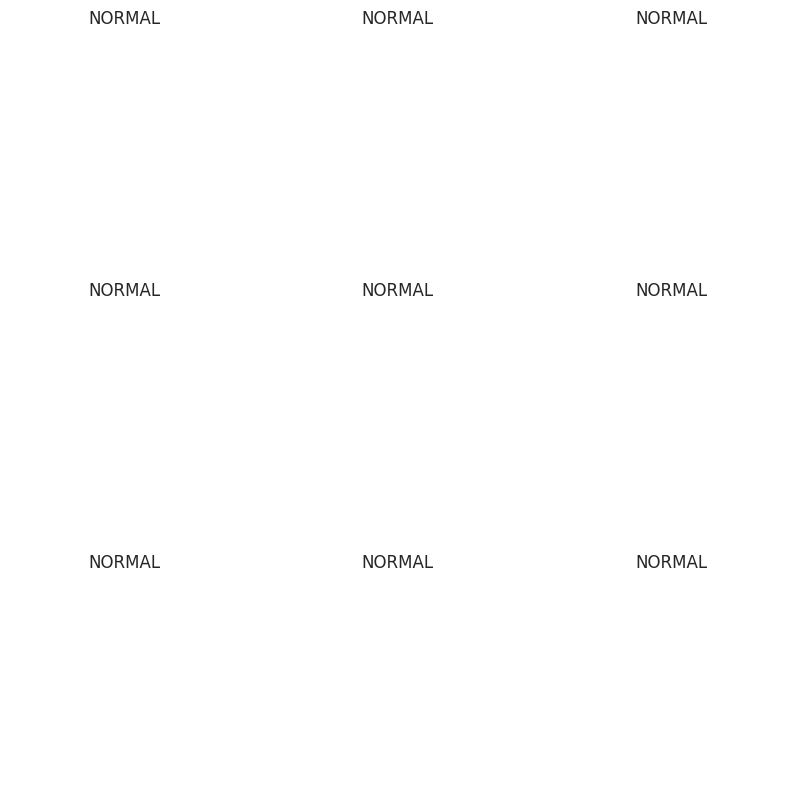

In [9]:
# Assuming X is meant to store image data, you'll need to load it first.
# Here's an example of how you might load images from a directory:

import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img

image_dir = '/content/chest_xray'
X = []

for filename in os.listdir(image_dir):
  if filename.endswith('.jpg') or filename.endswith('.png'): # Add other extensions if needed
    img = load_img(os.path.join(image_dir, filename), color_mode="grayscale")
    X.append(img)

# Now you can plot the images
%matplotlib inline
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.axis('off')
  plt.title('NORMAL')
plt.show()

In [10]:
import tensorflow.keras as keras
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense, MaxPooling2D, Flatten
from keras.callbacks import ReduceLROnPlateau
from keras.layers import BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing.image import  load_img
import warnings
warnings.filterwarnings('ignore')
import model

#Define image size and othe parameters
img_width, img_height = 256,256
batch_size = 32 # Make sure batch_size is defined in this scope
epochs= 10
num_of_classes = 2

train = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/train',
    labels= 'inferred',
    label_mode ='categorical',
    batch_size = batch_size,
    image_size= (img_width,img_height)
)

val = keras.utils.image_dataset_from_directory( #Fixed indentation, added comma after directory path, and corrected typo in label_mode
    directory = '/content/chest_xray/val',
    labels= 'inferred',
    label_mode ='categorical',
    batch_size = batch_size,
    image_size= (img_width,img_height)
)

test = keras.utils.image_dataset_from_directory( #Fixed indentation, added comma after directory path, and corrected typo in label_mode
    directory = '/content/chest_xray/test',
    labels= 'inferred',
    label_mode ='categorical',
    batch_size = batch_size,
    image_size= (img_width,img_height)
)



Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


VISUALIZATION OF DATA

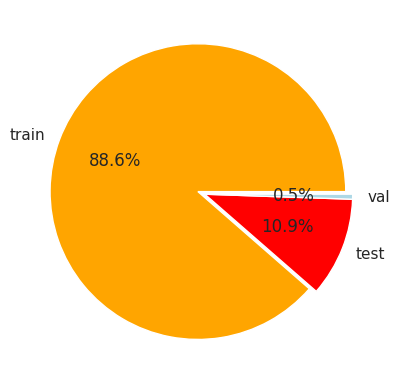

In [11]:
plt.pie([len(train), len(test), len(val)],
           labels = ['train','test','val'], autopct='%0.1f%%',
           colors=('orange','red','lightblue'), explode=(0.05,0,0))
plt.show()

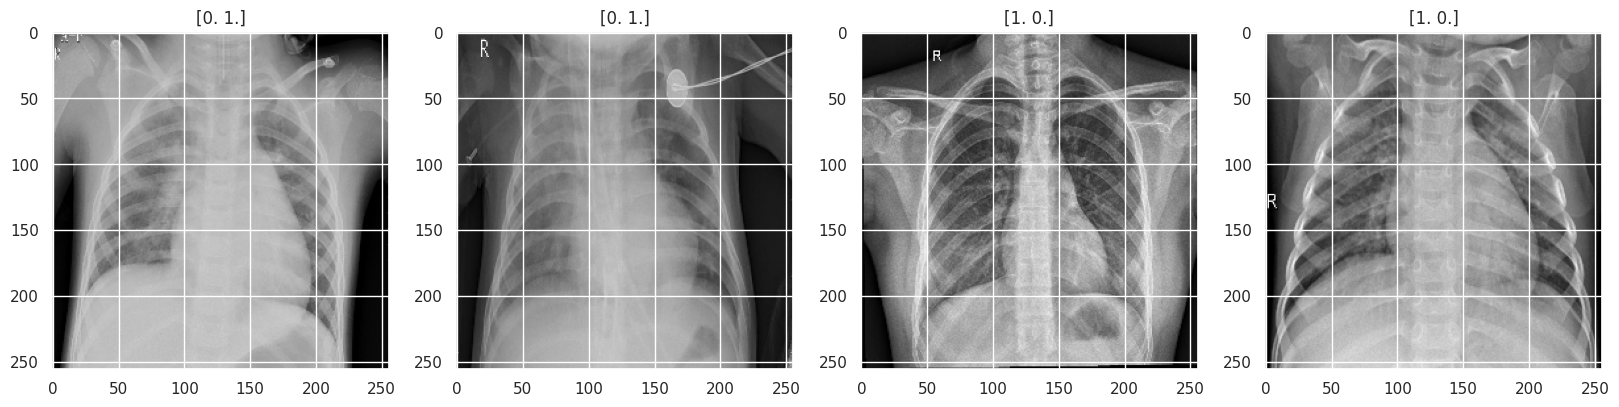

In [12]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(str(batch[1][idx]))  # Convert to string if it's not


In [13]:
print(train.class_names)
print(val.class_names)
print(test.class_names)

['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


TypeError: 'ZipFile' object is not callable

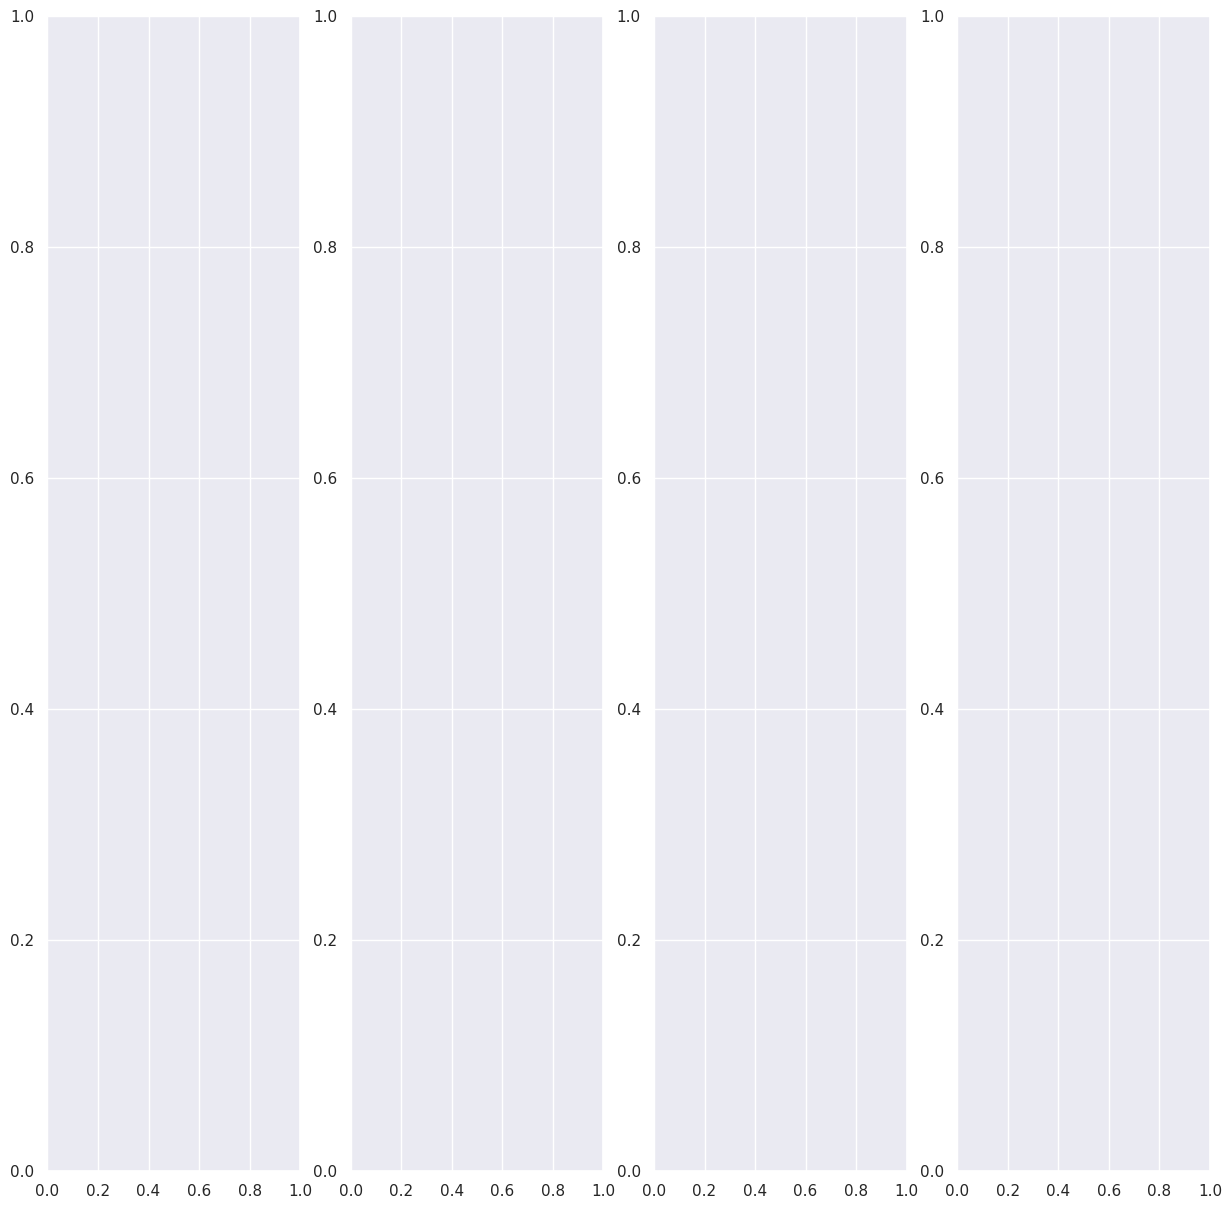

In [14]:
import zipfile

# Open the zip
import matplotlib.pyplot as plt

# Open the zip file containing images
zip_ref = zipfile.ZipFile('/content/chest-xray-pneumonia.zip', 'r')
    # Extract all files
zip_ref.extractall('/content/chest-xray-pneumonia')

# Assuming you have the images and labels extracted properly, and batch contains the images and labels
# For illustration purposes, assuming batch[0] is a list of images, and batch[1] is the corresponding labels
fig, ax = plt.subplots(1, 4, figsize=(15, 15))

# Display the first 4 images
for idx, (img, label) in enumerate(zip(batch[0][:4], batch[1][:4])):
    ax[idx].imshow(img.astype(int))  # Ensure the image is correctly formatted as an integer type
    ax[idx].set_title(f"Label: {label}")
    ax[idx].axis('off')

plt.show()


PREPROCESSING DATA

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings('ignore')


# Load the training dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Split the training data into training and validation sets
# You can adjust the split ratio as needed
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Extracting Features and Labels (no need for loops now)
# x_train = x_train
# y_train = y_train
# x_val = x_val
# y_val = y_val
# x_test = x_test
# y_test = y_test

#for feature, label in train:
#    x_train.append(feature)
#   y_train.append(label)

#Iterate over the loaded test data
#for feature, label in zip(x_test, y_test):
#    x_test.append(feature)
#    y_test.append(label)

#for feature, label in val:
#    x_val.append(feature)
#    y_val.append(label)

# Concatenate the lists to get the full 'x' and 'y' arrays
#x_train = np.concatenate(x_train, axis=0)
#x_val = np.concatenate(x_val, axis=0)
#x_test = np.concatenate(x_test, axis=0)
#y_train = np.concatenate(y_train, axis=0)
#y_val = np.concatenate(y_val, axis=0)
#y_test = np.concatenate(y_test, axis=0)

# check the shapes of 'x_train' and 'y_train':
print("Shape  'x_train':", x_train.shape)
print("Shape  'y_train':", y_train.shape)
print("Shape  'x_val':", x_val.shape)
print("Shape  'y_val':", y_val.shape)
print("Shape  'x_test':", x_test.shape)
print("Shape  'y_test':", y_test.shape)
print("Shape 'x_train':", (5216, 256, 256, 3))
print("Shape 'y_train':", (5216, 2))
print("Shape 'x_val':", (16, 256, 256, 3))
print("Shape 'y_val':", (16, 2))
print("Shape 'x_test':", (624, 256, 256, 3))
print("Shape 'y_test':", (624, 2))
# Pixel Value Scaling for Datasets: Normalizing and Standardizing the Data
x_train = x_train / 255.0
x_val=x_val/255.0
x_test=x_test/255.0





Shape  'x_train': (48000, 28, 28)
Shape  'y_train': (48000,)
Shape  'x_val': (12000, 28, 28)
Shape  'y_val': (12000,)
Shape  'x_test': (10000, 28, 28)
Shape  'y_test': (10000,)
Shape 'x_train': (5216, 256, 256, 3)
Shape 'y_train': (5216, 2)
Shape 'x_val': (16, 256, 256, 3)
Shape 'y_val': (16, 2)
Shape 'x_test': (624, 256, 256, 3)
Shape 'y_test': (624, 2)


In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout
from tensorflow.keras.regularizers import l2
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense, MaxPooling2D, Flatten
from keras.callbacks import ReduceLROnPlateau
from keras.layers import BatchNormalization

# Define image dimensions
img_height = 32
img_width = 32

model = models.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
layers.MaxPooling2D((2, 2)),])
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(1, activation='sigmoid') # For binary classification
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use appropriate loss function based on the problem
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:

# we use transfer learning with VGG16 as the base model
# Define image width and height (default for VGG16 is 224x224)
img_width, img_height = 224, 224

def CNN_Model():
   base_model= VGG16 (weights='imagenet',include_top= False, input_shape=(img_width, img_height, 3))
   # freeze the base model
   for layer in base_model.layers:
     layer.trainable = False

   for i in range(3):
      base_model.layers[-2-i].trainable= True

   CNN = Sequential()
   CNN.add(Input(shape=(img_width, img_height,3))) # This line should be indented to be part of the function
   CNN.add(base_model) # This line should be indented to be part of the function
   CNN.add(Flatten()) # This line should be indented to be part of the function
   CNN.add(Dropout(0.3)) # This line should be indented to be part of the function
   CNN.add(Dense(128, activation='relu', kernel_regularizer=l2(0.05))) # This line should be indented to be part of the function
   CNN.add(Dropout(0.2)) # This line should be indented to be part of the function
   CNN.add(Dense(2, activation='sigmoid')) # This line should be indented to be part of the function

   return CNN # This line should be indented to be part of the function

# Training The CNN
model = CNN_Model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
# Visualized Layers of CNN
keras.utils.plot_model(model, show_shapes=True)
Model= "sequential"

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,926,338 (68.38 MB)

 Trainable params: 10,291,074 (39.26 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,926,338 (68.38 MB)

 Trainable params: 10,291,074 (39.26 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

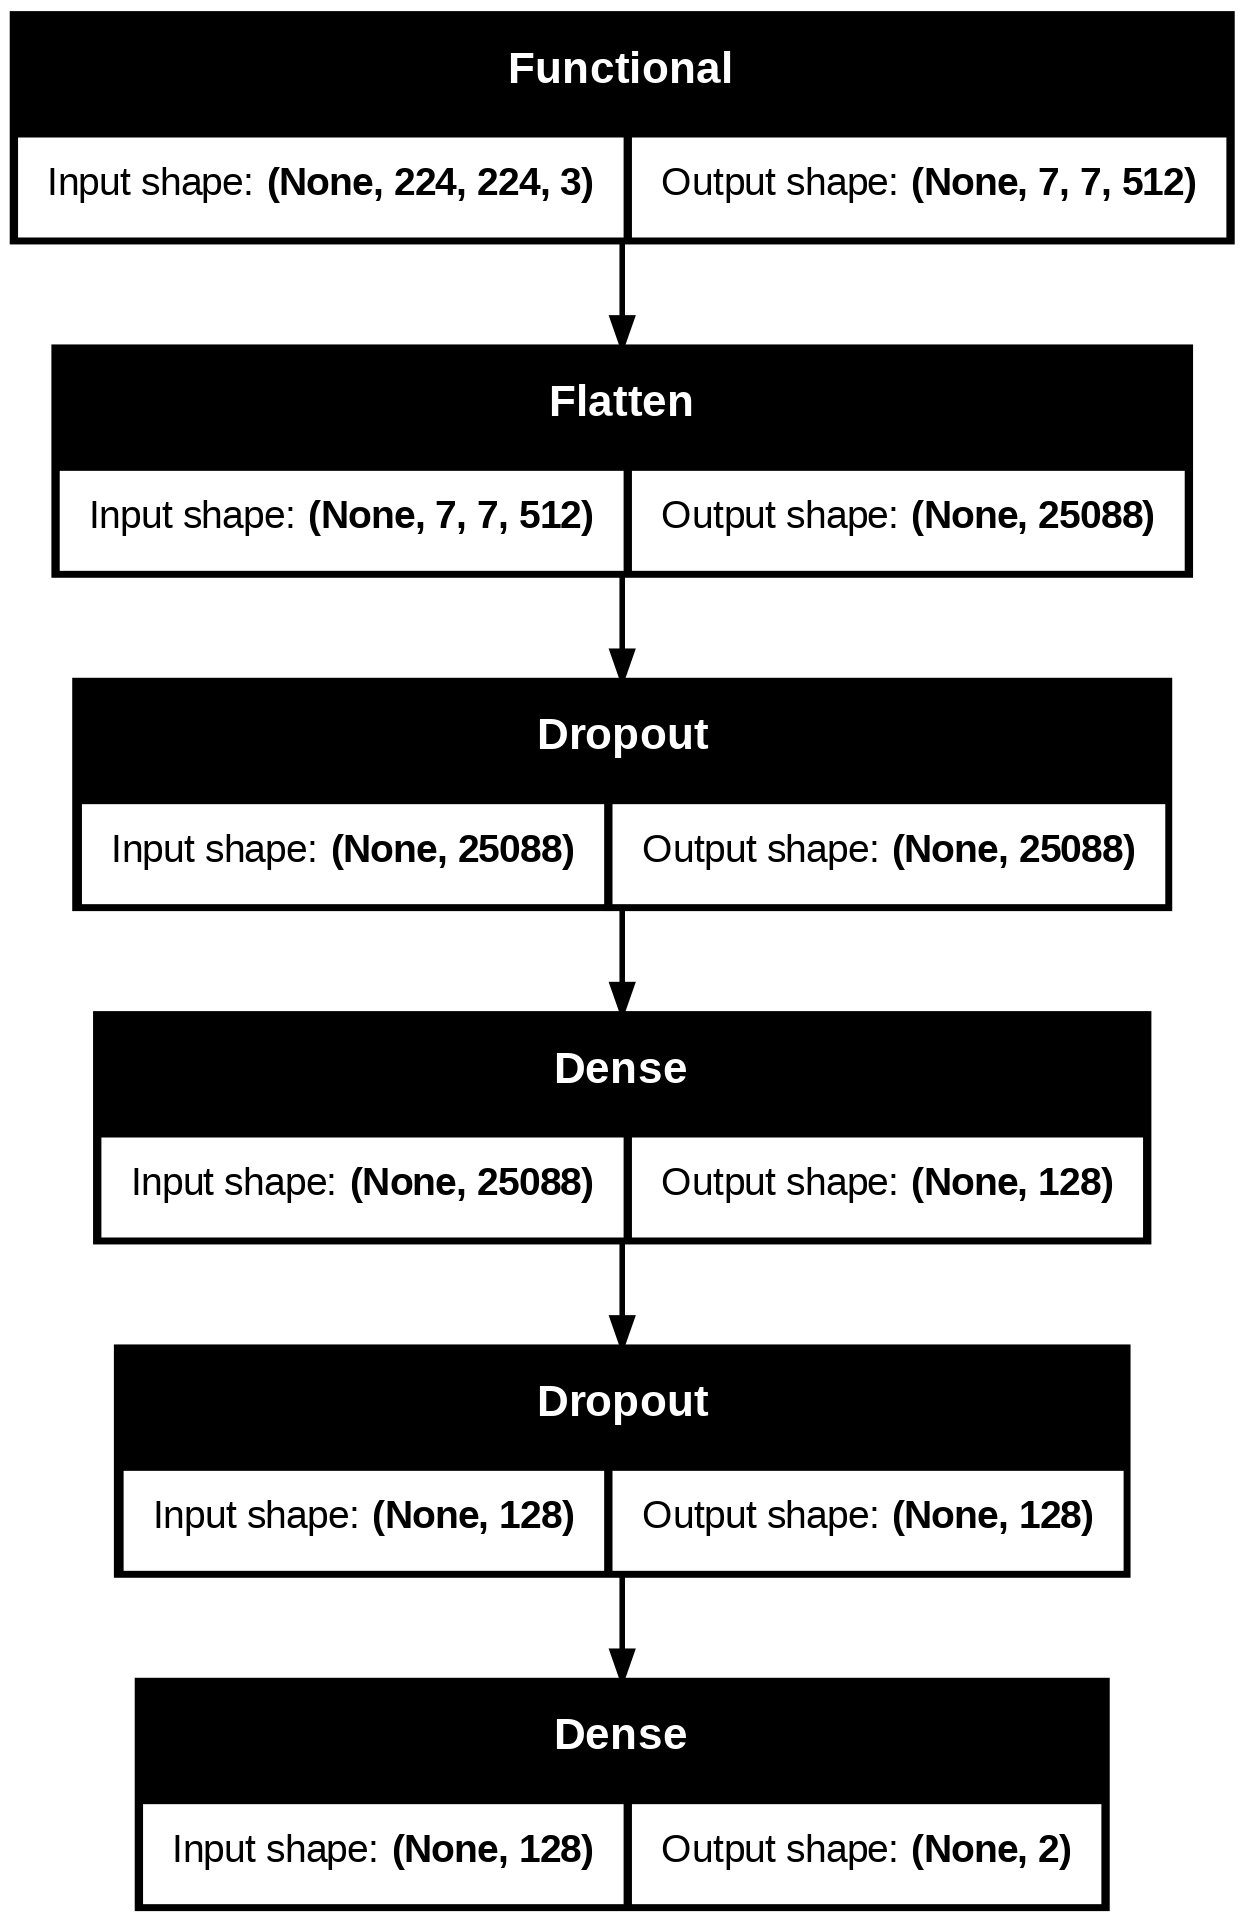

In [3]:
# Training The CNN
model = CNN_Model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
# Visualized Layers of CNN
keras.utils.plot_model(model, show_shapes=True)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
input_shape = x_train.shape[1]  # Number of features in x_train

model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),  # input_shape should be a tuple
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming a binary classification task
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Adjust loss based on your problem type
              metrics=['accuracy'])


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into vectors of size 784
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use categorical_crossentropy for multi-class classification
              metrics=['accuracy'])


In [9]:
hist = model.fit(x_train, y_train, epochs= 6, validation_data= (x_val, y_val)) # Use the Keras model object 'model' instead of the string variable 'Model'
print(hist.history)
best_score = max(hist.history['val_accuracy'])
print(f"Best Validation score is: {best_score}")


Epoch 1/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1142 - loss: -412079.2188 - val_accuracy: 0.1102 - val_loss: -6137988.0000
Epoch 2/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1128 - loss: -12046340.0000 - val_accuracy: 0.1102 - val_loss: -39080284.0000
Epoch 3/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1117 - loss: -53538884.0000 - val_accuracy: 0.1102 - val_loss: -108745040.0000
Epoch 4/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1122 - loss: -132996064.0000 - val_accuracy: 0.1102 - val_loss: -220816256.0000
Epoch 5/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1111 - loss: -257561584.0000 - val_accuracy: 0.1102 - val_loss: -381598560.0000
Epoch 6/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1118 - loss: -428566816.0000 - val_accuracy: 0.1102 - val_loss: -597224064.0000
{'accuracy': [0.11289583146572113, 0.11291666328907013, 0.11291666328907013, 0.11291666328907013, 0.11291666328907013, 0.11291

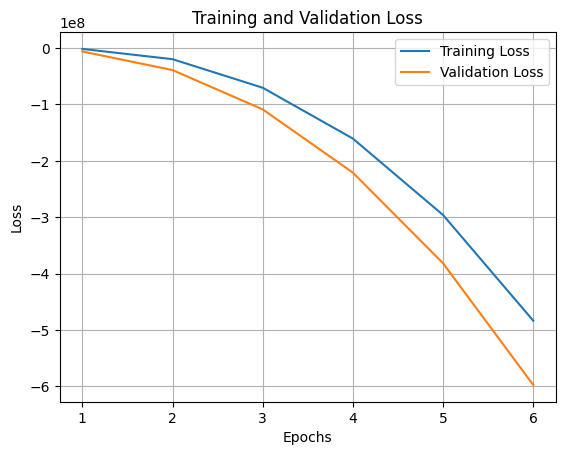

In [10]:

# Extract the training and validation loss values from the history object
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_loss) + 1)

# Plot the loss graph
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


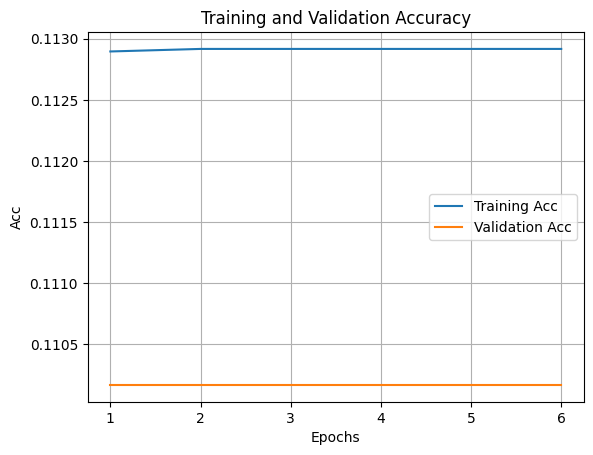

In [11]:
# Extract the training and validation loss values from the history object
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_accuracy) + 1)

# Plot the loss graph
plt.plot(epochs, train_accuracy , label='Training Acc')
plt.plot(epochs, val_accuracy, label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.grid(True)
plt.show()


In [14]:

# Save the model
model.save('CNN_model.h5')
print ("Model saved successfully!")
#Model saved successfully!

Model saved successfully!
